# Group assignment 2: Income demographics of CA counties
by Matt Phillips

I'm going to be looking at the median individual income across all counties in California. My final project is looking at how fossil fuel and clean energy jobs are distributed throughout the state. While there are more demographic breakdowns to make, I'm starting with income (because we already did race in class and I wanted to try something different but still relevant). I decided to do median individual (personal) income for two reasons: first because the household income data wasn't available for every county, and second because I thought the one-to-one argument of high-paying clean energy jobs to individual income would make more sense than household income.

First I'll import pandas, geopandas, contextily, and pyplot. Then I'll load the income data I got from censusreporter as a geojson file.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('CA_Income_acs2019.geojson')

I'm going to make sure the data loaded and then do some basic inspection.

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf.shape

(59, 5)

In [5]:
gdf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,04000US06,California,75235.0,232.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
1,05000US06001,"Alameda County, CA",99406.0,921.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",63750.0,17778.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",62772.0,2756.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",52537.0,1618.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."


Looks like it worked, although my income and margin of error columns will need to be renamed. I'll plot it just to be sure it looks right

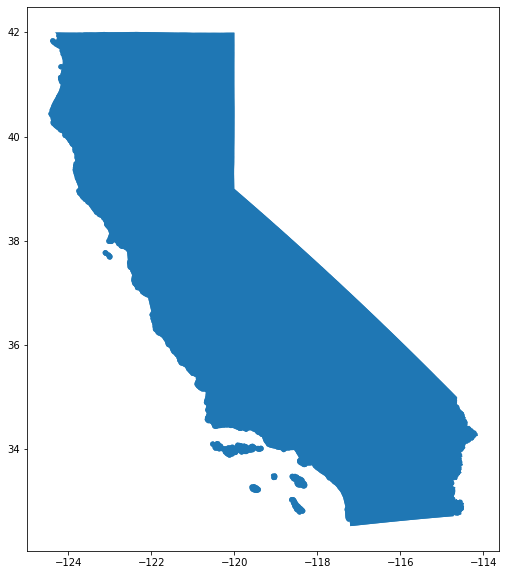

In [6]:
gdf.plot(figsize=(10,10))

Yup, looks right! This dataset includes every county in CA, so I'd expect the map to look like a blank map of CA. I wonder why it doesn't show lines between the counties, though... Maybe that needs a more advanced map than I can do using the basic plot() function.

Either way, I need to delete the statewide row in position 0 and to rename some columns. I also think I need to drop the margin of error column, but I'm not sure yet if that makes sense or if I need to do that.

In [7]:
gdf = gdf.drop([0])

In [8]:
gdf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
1,05000US06001,"Alameda County, CA",99406.0,921.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",63750.0,17778.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",62772.0,2756.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",52537.0,1618.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",63158.0,4128.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


In [9]:
list(gdf)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

I don't need the margin of error column, so I'm going to remove it.

In [10]:
columns_to_keep = ['geoid', 'name', 'B19013001', 'geometry']

Now I need to redefine the dataframe with only those four columns.

In [11]:
gdf = gdf[columns_to_keep]

In [12]:
gdf.head()

,geoid,name,B19013001,geometry
1,05000US06001,"Alameda County, CA",99406.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",63750.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",62772.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",52537.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",63158.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


I redefined the dataset and used the head() command to double-check that it worked. Now I want to rename the median income column.

In [13]:
gdf.columns = ['geoid', 'name', 'median income', 'geometry']

In [14]:
gdf.head()

,geoid,name,median income,geometry
1,05000US06001,"Alameda County, CA",99406.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",63750.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",62772.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",52537.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",63158.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


Great! Looks like it worked. I now have clean data for median individual income for every county in CA.

I'm going to use a few commands to get some simple stats and mess around with some plots

In [15]:
gdf['name'].describe()

count                        58
unique                       58
top       San Benito County, CA
freq                          1
Name: name, dtype: object

That doesn't really tell me much I didn't already know, except that there are 58 counties in this map.

In [16]:
gdf['median income'].describe()

count        58.000000
mean      67713.603448
std       20213.449856
min       40846.000000
25%       53430.500000
50%       62516.000000
75%       80508.500000
max      124055.000000
Name: median income, dtype: float64

Using the describe() function, I can see what the highest, lowest, and average median income in CA is, as well as a quartile breakdown. The lowest median income is 40846. The highest median income is 124055--that's about 3x the minimum. California is very unequal. What would a histogram of median incomes look like?

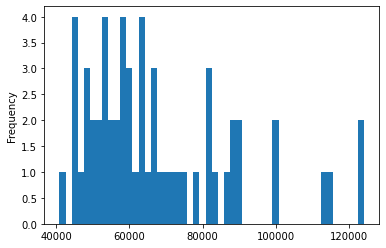

In [17]:
gdf['median income'].plot.hist(bins=50)

Wow that's ugly... I'll try it with fewer bins.

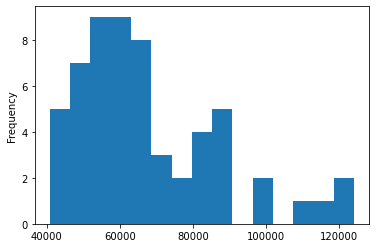

In [18]:
gdf['median income'].plot.hist(bins=15)

That looks a little better. Clearly there are more counties around the 60,000 than in higher income brackets. Still, it looks like the majority of counties in the state have median incomes below 75,000 per year.

I want to know which counties have the lowest and highest median incomes (i.e. which counties those values correspond to.

Update: I tried this a few different ways (several iloc and loc searches) and it got pretty messy. I'm going to look at all the data so I know which county I'm looking for, and then try to work backwards to figure out how to get median income. To do that, I have to override pandas setting limiting it to showing the first and last rows.

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
print(gdf)

           geoid                        name  median income  \
1   05000US06001          Alameda County, CA        99406.0   
2   05000US06003           Alpine County, CA        63750.0   
3   05000US06005           Amador County, CA        62772.0   
4   05000US06007            Butte County, CA        52537.0   
5   05000US06009        Calaveras County, CA        63158.0   
6   05000US06011           Colusa County, CA        59401.0   
7   05000US06013     Contra Costa County, CA        99716.0   
8   05000US06015        Del Norte County, CA        45283.0   
9   05000US06017        El Dorado County, CA        83377.0   
10  05000US06019           Fresno County, CA        53969.0   
11  05000US06021            Glenn County, CA        49633.0   
12  05000US06023         Humboldt County, CA        48041.0   
13  05000US06025         Imperial County, CA        47622.0   
14  05000US06027             Inyo County, CA        57316.0   
15  05000US06029             Kern County, CA        533

It looks like Trinity County, CA has the lowest median income (40846.0) in the state. Let's see if I can use this to get at what I want.

In [21]:
gdf.loc[gdf['median income']==40846.0]

,geoid,name,median income,geometry
53,05000US06105,"Trinity County, CA",40846.0,"MULTIPOLYGON (((-123.54396 40.73294, -123.5438..."


Cool it worked! I guess I was running the wrong .loc command before. Now I'll do the same for the highest income county.

In [22]:
gdf.loc[gdf['median income']==40846.0]
gdf.loc[gdf['median income']==124055.0]

,geoid,name,median income,geometry
43,05000US06085,"Santa Clara County, CA",124055.0,"MULTIPOLYGON (((-122.04412 37.20049, -122.0440..."


I wanted it to show both on the same table but that didn't work. Maybe I'll try sorting it and then selecting those two counties.

In [23]:
gdf_sorted = gdf.sort_values(by='median income', ascending = False)

In [24]:
gdf_sorted[['name','median income']]

,name,median income
43,"Santa Clara County, CA",124055.0
41,"San Mateo County, CA",122641.0
21,"Marin County, CA",115246.0
38,"San Francisco County, CA",112449.0
7,"Contra Costa County, CA",99716.0
1,"Alameda County, CA",99406.0
30,"Orange County, CA",90234.0
31,"Placer County, CA",89691.0
28,"Napa County, CA",88596.0
56,"Ventura County, CA",88131.0


In [25]:
gdf_sorted.loc[gdf_sorted['median income'].isin(['124055.0','40846.0'])]

,geoid,name,median income,geometry
43,05000US06085,"Santa Clara County, CA",124055.0,"MULTIPOLYGON (((-122.04412 37.20049, -122.0440..."
53,05000US06105,"Trinity County, CA",40846.0,"MULTIPOLYGON (((-123.54396 40.73294, -123.5438..."


Cool it worked! I found the ".isin" command on stackoverflow. I'm not totally sure how it works/what the syntax is telling it to do but it worked!

What are the top 10 wealthiest counties?

In [26]:
gdf_sorted[['name','median income']].head(10)

,name,median income
43,"Santa Clara County, CA",124055.0
41,"San Mateo County, CA",122641.0
21,"Marin County, CA",115246.0
38,"San Francisco County, CA",112449.0
7,"Contra Costa County, CA",99716.0
1,"Alameda County, CA",99406.0
30,"Orange County, CA",90234.0
31,"Placer County, CA",89691.0
28,"Napa County, CA",88596.0
56,"Ventura County, CA",88131.0


This shows the top 10 wealthiest counties in the state. I'll plot it.

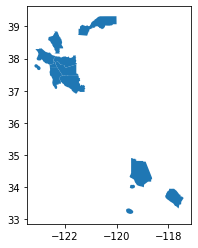

In [27]:
gdf_sorted.head(10).plot()

It looks like most of them are coastal, though I can't be sure based on this map.  What about the poorest 10?

In [28]:
gdf_sorted[['name','median income']].tail(10)

,name,median income
11,"Glenn County, CA",49633.0
22,"Mariposa County, CA",48820.0
12,"Humboldt County, CA",48041.0
13,"Imperial County, CA",47622.0
17,"Lake County, CA",47040.0
25,"Modoc County, CA",45507.0
8,"Del Norte County, CA",45283.0
47,"Siskiyou County, CA",45241.0
52,"Tehama County, CA",44514.0
53,"Trinity County, CA",40846.0


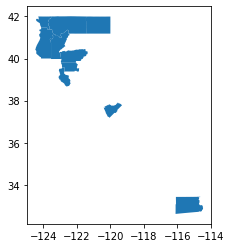

In [29]:
gdf_sorted.tail(10).plot()

These are the 10 counties with the lowest median income.

Now I need to make some more useful (and prettier) maps.

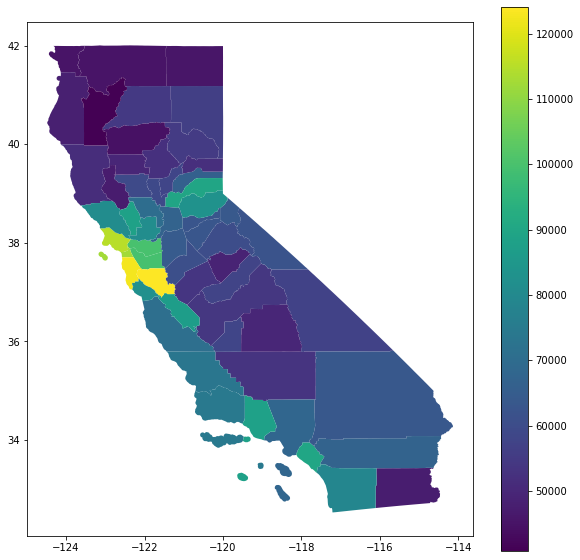

In [30]:
gdf.plot(figsize=(10,10),column='median income',legend=True)

This is a chloropleth map of median income in CA by county. It shows about what I expected--coastal counties are generally more well-off, rural/inland counties less so (though look at the counties around Lake Tahoe). Let's make it prettier.

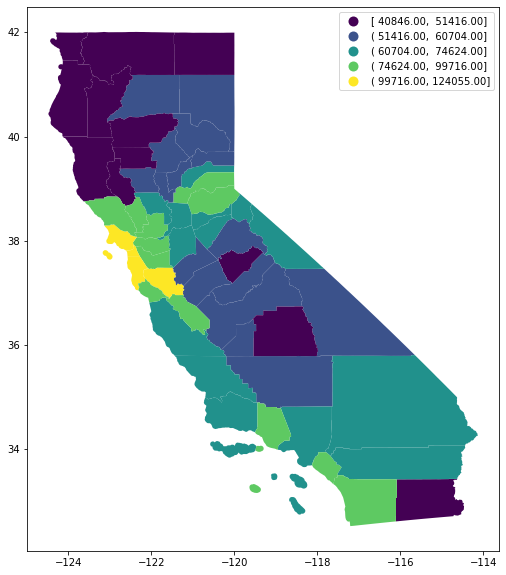

In [31]:
gdf.plot(figsize=(12,10),
                 column='median income',
                 legend=True, 
                 scheme='NaturalBreaks')

This shows the same info with Natural Breaks. I'm going to see what quantiles does.

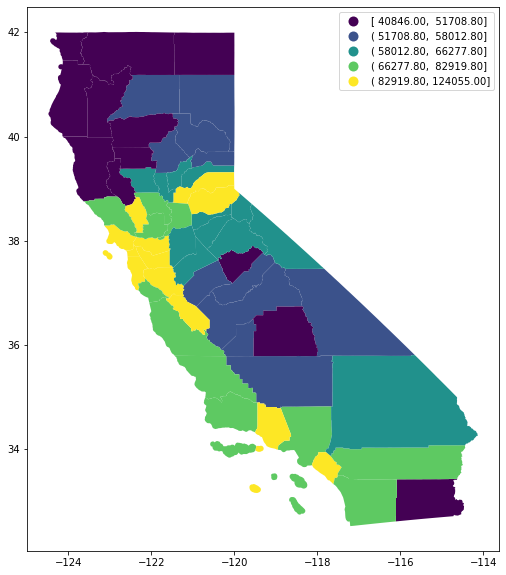

In [32]:
gdf.plot(figsize=(12,10),
                 column='median income',
                 legend=True, 
                 scheme='quantiles')

I'm not sure which one of these is better. They both have similar breakdowns in income classes, but the Natural Breaks version just looks cleaner to me.

I only have one variable in this dataframe (lucky me) so I'm going to go straight to adding a basemap. I'll use the contextily library, which first requires me to change to a Mercator projection.

In [33]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [34]:
gdf_web_mercator.head()

,geoid,name,median income,geometry
1,05000US06001,"Alameda County, CA",99406.0,"MULTIPOLYGON (((-13612245.295 4538149.389, -13..."
2,05000US06003,"Alpine County, CA",63750.0,"MULTIPOLYGON (((-13366502.065 4678945.274, -13..."
3,05000US06005,"Amador County, CA",62772.0,"MULTIPOLYGON (((-13472696.406 4647651.506, -13..."
4,05000US06007,"Butte County, CA",52537.0,"MULTIPOLYGON (((-13565003.307 4798393.384, -13..."
5,05000US06009,"Calaveras County, CA",63158.0,"MULTIPOLYGON (((-13428574.035 4627724.500, -13..."


Okay now that that's done, I'll add a basemap. I have to make sure contextily knows what I want it to do, which requires me to enter some commands I don't fully understand. Either way, I need to plot the layer that shows the data I want, then set a title, and then add a basemap.

The median state income (from row 0 originally) is 75235.0, so I'll use that to map counties where the median individual income is less than that.

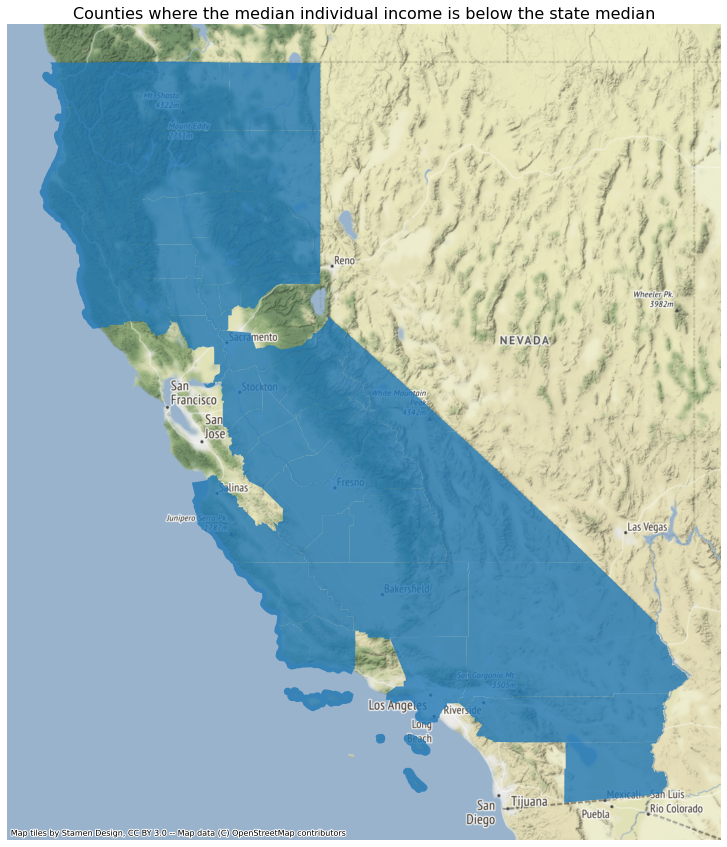

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator[gdf_web_mercator['median income'] < 75235.0 ].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Counties where the median individual income is below the state median',fontsize=16)
ctx.add_basemap(ax)

This is similar to the map we made in lab. It shows counties in the state with individual incomes below the median state income. It's not that great a map, though, since we're working with county data. I want to try and make it a little clearer. I'll add clearer lines between the counties, make the blue less dark by lowering the alpha value, and changing the basemap to something that has more labels. I'm also going to make the whole map a little bigger so we can see the labels better.

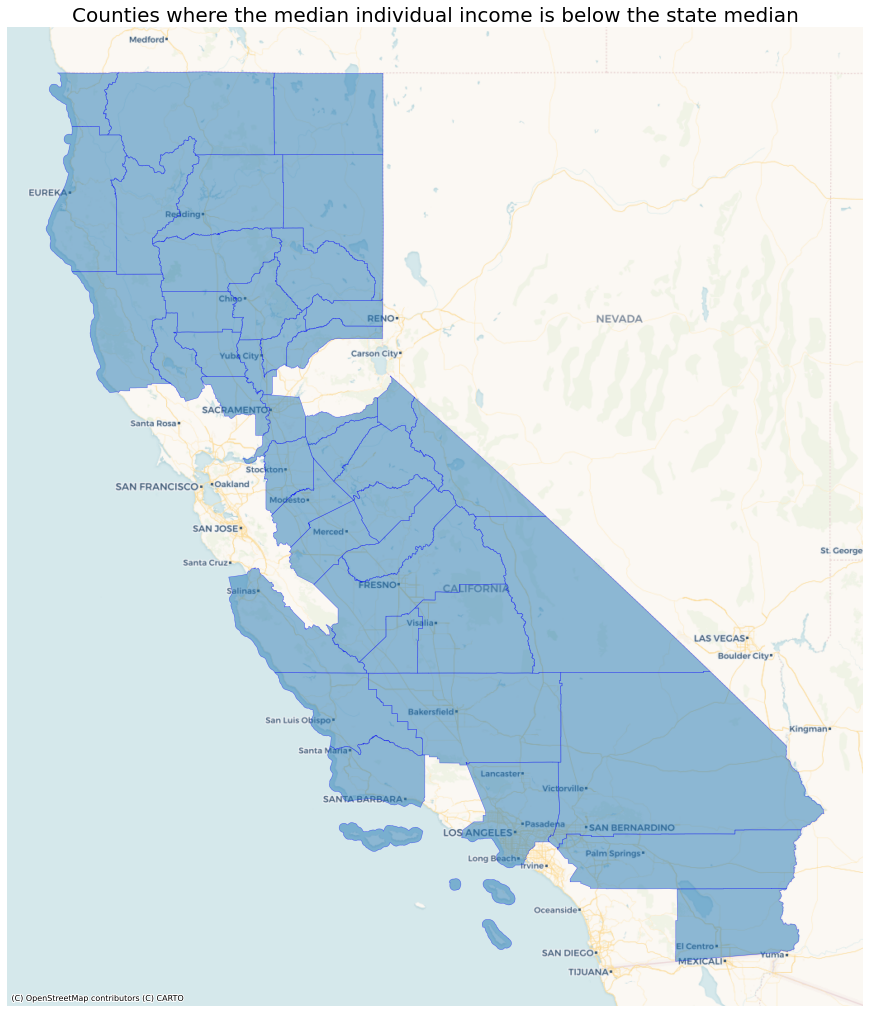

In [37]:
fig, ax = plt.subplots(figsize=(18, 18))
gdf_web_mercator[gdf_web_mercator['median income'] < 75235.0 ].plot(ax=ax, alpha=0.5, edgecolor="blue", linewidth=0.5)
ax.axis('off')
ax.set_title('Counties where the median individual income is below the state median',fontsize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

So here's the final map showing counties in California where the median individual income is less than the median individual income statewide.